10.440705879552727
82.84758239143079
-16.26821870290159
93.65291026530667


Text(0, 0.5, 'sous_seg')

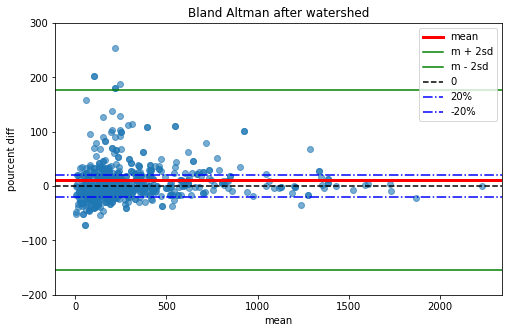

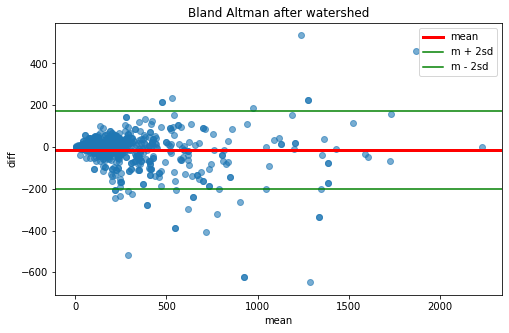

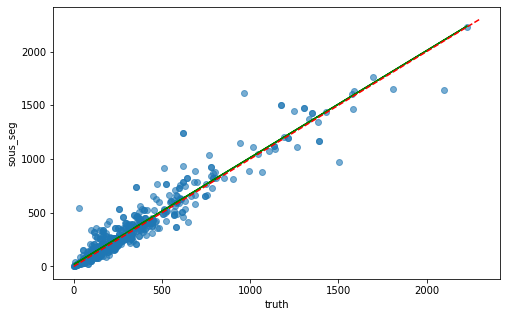

In [8]:
mean = []
diff = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))

    diff.append(truth[i] - sous_seg[i])


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(0, c='black', linestyle='--',label = '0' )
plt.axhline(20, c='blue',label = '20%', linestyle='dashdot' )
plt.axhline(-20, c='blue',label = '-20%' ,linestyle='dashdot' )
plt.scatter(mean, pourcent, alpha=0.6)
plt.ylim(-200, 300)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')





f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(diff)
sd = np.std(diff)
print(moy)
print(sd)
plt.axhline(moy, c='r', label='mean', linewidth=3)
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.scatter(mean, diff, alpha=0.6)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('diff')
plt.legend()
plt.title('Bland Altman after watershed')



from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(truth, sous_seg)

def regression(x, slope, intercept):
    y = []
    for i in range(len(x)):
        y.append(slope * x[i] + intercept)

    return y 


f = plt.figure(figsize=(8,5))
axes = plt.gca()
plt.scatter(truth, sous_seg, alpha=0.6)
plt.plot(truth, regression(truth, slope, intercept), c='green', label='regression lin')
plt.plot([0,2300], [0,2300], 'r--', label='x=y')
plt.xlabel('truth')
plt.ylabel('sous_seg')


In [9]:
print(r_value)

0.9554564843877554
